In [1]:
import pandas as pd
import pandas_datareader.data as wb
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime
import time 

import chainer
from chainer import cuda,Function,gradient_check,Variable,optimizers,serializers,utils
from chainer import Link,Chain,ChainList
import chainer.functions as F
import chainer.links as L
cuda.get_device(0).use()
xp = cuda.cupy


/usr/local/lib/python2.7/dist-packages/chainer/cuda.py:92: UserWarning: cuDNN is not enabled.
Please reinstall chainer after you install cudnn
(see https://github.com/pfnet/chainer#installation).
  'cuDNN is not enabled.\n'


In [2]:
start = datetime(1970,1,1)
end = datetime(2016,7,20)

df = wb.DataReader("^N225","yahoo",start,end)


/usr/local/lib/python2.7/dist-packages/requests/packages/urllib3/util/ssl_.py:334: SNIMissingWarning: An HTTPS request has been made, but the SNI (Subject Name Indication) extension to TLS is not available on this platform. This may cause the server to present an incorrect TLS certificate, which can cause validation failures. You can upgrade to a newer version of Python to solve this. For more information, see https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  SNIMissingWarning
/usr/local/lib/python2.7/dist-packages/requests/packages/urllib3/util/ssl_.py:132: InsecurePlatformWarning: A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail. You can upgrade to a newer version of Python to solve this. For more information, see https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecurePlatformWarning


In [3]:
data = df["Adj Close"]

def split_data(data):
    
    train,val,test=data[:5125],data[5125:(5125+1285)],data[(5125+1285):]
    
    return train,val,test

train,val,test=split_data(data)

def group_data(data):
    data_ = []
    for t in xrange(len(data)-25):
        data_.append(data[t:t+25:5])
    return data_

train = group_data(train)
val = group_data(val)
test = group_data(test)

def split_xy(data):
    data_x=[]
    data_y=[]
    for i in xrange(len(data)-25):
        k = data[i:i+25:5]
        data_x.append(k)
        j = data[5+i]
        data_y.append(j)
    data_x = np.array(data_x,dtype=np.float32)
    data_y = np.array(data_y,dtype=np.float32)
    return data_x,data_y

train_x ,train_y = split_xy(train)
val_x,val_y = split_xy(val)
test_x,test_y = split_xy(test)

train_x = xp.array(train_x)
train_y = xp.array(train_y)
val_x = xp.array(val_x)
val_y = xp.array(val_y)
test_x = xp.array(test_x)
test_y = xp.array(test_y)

print train_x.shape
print train_x[0].shape
print train_x[0][0].shape

(5075, 5, 5)
(5, 5)
(5,)


In [4]:
class ChaosNN(Chain):
    def __init__(self):
        super(ChaosNN,self).__init__(
        i1 = L.Linear(5,50),
        i2 = L.Linear(5,50),
        i3 = L.Linear(5,50),
        i4 = L.Linear(5,50),
        i5 = L.Linear(5,50),
            
        l1 = L.Linear(250,250),
        l2 = L.Linear(250,250),
        l3 = L.Linear(250,250),
        l4 = L.Linear(250,250),
        l5 = L.Linear(250,250),
        l6 = L.Linear(250,250),
        l7 = L.Linear(250,250),
        l8 = L.Linear(250,250),
        l9 = L.Linear(250,250),
        l10 = L.Linear(250,250),
            
        output = L.Linear(250,5)
        )
        
    def __call__(self,x0,x1,x2,x3,x4,y):
        h1 = F.relu(self.i1(x0))
        h2 = F.relu(self.i2(x1))
        h3 = F.relu(self.i3(x2))
        h4 = F.relu(self.i4(x3))
        h5 = F.relu(self.i5(x4))
        h = F.relu(self.l1(F.concat((h1,h2,h3,h4,h5),axis=1)))
        h = F.relu(self.l2(h))
        h = F.relu(self.l3(h))
        h = F.relu(self.l4(h))
        h = F.relu(self.l5(h))
        h = F.relu(self.l6(h))
        h = F.relu(self.l7(h))
        h = F.relu(self.l8(h))
        h = F.relu(self.l9(h))
        h = F.relu(self.l10(h))
        h = F.relu(self.output(h))
        loss = F.mean_squared_error(h,y)
        return loss


GPU: 0
# epoch: 1000
epoch 1
train mean loss=625543.698311, accuracy=0, throughput=122.20331981 images/sec
test  mean loss=234845.389967, accuracy=0
epoch 2
train mean loss=405703.321612, accuracy=0, throughput=124.011966666 images/sec
test  mean loss=208654.079018, accuracy=0
epoch 3
train mean loss=382462.290566, accuracy=0, throughput=121.771428931 images/sec
test  mean loss=205734.25606, accuracy=0
epoch 4
train mean loss=362936.736297, accuracy=0, throughput=122.236318572 images/sec
test  mean loss=194265.660454, accuracy=0
epoch 5
train mean loss=341401.536988, accuracy=0, throughput=121.632580741 images/sec
test  mean loss=186371.11872, accuracy=0
epoch 6
train mean loss=336653.251562, accuracy=0, throughput=122.269499505 images/sec
test  mean loss=186561.879098, accuracy=0
epoch 7
train mean loss=320978.818712, accuracy=0, throughput=122.371847653 images/sec
test  mean loss=180637.142544, accuracy=0
epoch 8
train mean loss=311989.880732, accuracy=0, throughput=123.579610935 ima

test  mean loss=165951.447764, accuracy=0
epoch 65
train mean loss=289153.736376, accuracy=0, throughput=122.738061443 images/sec
test  mean loss=166764.11243, accuracy=0
epoch 66
train mean loss=288537.57201, accuracy=0, throughput=122.79848603 images/sec
test  mean loss=166952.928152, accuracy=0
epoch 67
train mean loss=289322.184068, accuracy=0, throughput=123.01881848 images/sec
test  mean loss=167483.683789, accuracy=0
epoch 68
train mean loss=289195.692191, accuracy=0, throughput=122.111667644 images/sec
test  mean loss=167783.819173, accuracy=0
epoch 69
train mean loss=289638.809547, accuracy=0, throughput=122.833762666 images/sec
test  mean loss=168534.906267, accuracy=0
epoch 70
train mean loss=289997.934739, accuracy=0, throughput=123.645996561 images/sec
test  mean loss=168956.709303, accuracy=0
epoch 71
train mean loss=290051.102855, accuracy=0, throughput=123.503283055 images/sec
test  mean loss=169660.351832, accuracy=0
epoch 72
train mean loss=289962.026755, accuracy=0, 

test  mean loss=192520.110599, accuracy=0
epoch 128
train mean loss=277629.443315, accuracy=0, throughput=123.842817375 images/sec
test  mean loss=193180.256659, accuracy=0
epoch 129
train mean loss=277230.35746, accuracy=0, throughput=124.075002622 images/sec
test  mean loss=193860.549395, accuracy=0
epoch 130
train mean loss=277131.103957, accuracy=0, throughput=122.544172891 images/sec
test  mean loss=194324.40717, accuracy=0
epoch 131
train mean loss=276845.563338, accuracy=0, throughput=123.302920618 images/sec
test  mean loss=195020.891518, accuracy=0
epoch 132
train mean loss=276559.290825, accuracy=0, throughput=121.524652167 images/sec
test  mean loss=195857.003915, accuracy=0
epoch 133
train mean loss=276282.946475, accuracy=0, throughput=116.261614101 images/sec
test  mean loss=196657.175365, accuracy=0
epoch 134
train mean loss=276039.429592, accuracy=0, throughput=122.01989545 images/sec
test  mean loss=206263.06688, accuracy=0
epoch 135
train mean loss=274755.868648, accu

test  mean loss=231752.584396, accuracy=0
epoch 191
train mean loss=271511.379866, accuracy=0, throughput=122.701510716 images/sec
test  mean loss=232681.666007, accuracy=0
epoch 192
train mean loss=271547.43753, accuracy=0, throughput=113.481220161 images/sec
test  mean loss=233426.893336, accuracy=0
epoch 193
train mean loss=271602.464071, accuracy=0, throughput=123.999765027 images/sec
test  mean loss=238198.743466, accuracy=0
epoch 194
train mean loss=271863.71673, accuracy=0, throughput=124.102311771 images/sec
test  mean loss=241222.193399, accuracy=0
epoch 195
train mean loss=271608.304053, accuracy=0, throughput=123.762512112 images/sec
test  mean loss=242231.021249, accuracy=0
epoch 196
train mean loss=271458.128981, accuracy=0, throughput=107.900570975 images/sec
test  mean loss=242929.862339, accuracy=0
epoch 197
train mean loss=271448.204708, accuracy=0, throughput=120.250231472 images/sec
test  mean loss=242173.778253, accuracy=0
epoch 198
train mean loss=271427.134676, ac

test  mean loss=293040.731872, accuracy=0
epoch 254
train mean loss=268450.457928, accuracy=0, throughput=120.798115104 images/sec
test  mean loss=285618.207623, accuracy=0
epoch 255
train mean loss=268347.719507, accuracy=0, throughput=120.987906798 images/sec
test  mean loss=293422.786983, accuracy=0
epoch 256
train mean loss=268266.396594, accuracy=0, throughput=121.927294497 images/sec
test  mean loss=294179.90615, accuracy=0
epoch 257
train mean loss=268128.250707, accuracy=0, throughput=122.844517205 images/sec
test  mean loss=294526.334726, accuracy=0
epoch 258
train mean loss=268033.153176, accuracy=0, throughput=122.502831161 images/sec
test  mean loss=294978.789601, accuracy=0
epoch 259
train mean loss=267796.279061, accuracy=0, throughput=123.685000187 images/sec
test  mean loss=294918.874937, accuracy=0
epoch 260
train mean loss=267715.205487, accuracy=0, throughput=123.821457659 images/sec
test  mean loss=295439.892436, accuracy=0
epoch 261
train mean loss=267696.470799, a

test  mean loss=343840.321512, accuracy=0
epoch 317
train mean loss=263598.20194, accuracy=0, throughput=123.960922884 images/sec
test  mean loss=344702.109076, accuracy=0
epoch 318
train mean loss=263519.743936, accuracy=0, throughput=124.031536923 images/sec
test  mean loss=345801.479001, accuracy=0
epoch 319
train mean loss=263462.918034, accuracy=0, throughput=123.991433316 images/sec
test  mean loss=346648.590915, accuracy=0
epoch 320
train mean loss=263398.72657, accuracy=0, throughput=123.921135457 images/sec
test  mean loss=347660.072186, accuracy=0
epoch 321
train mean loss=263369.68827, accuracy=0, throughput=123.818251816 images/sec
test  mean loss=348466.77611, accuracy=0
epoch 322
train mean loss=263312.789797, accuracy=0, throughput=124.076394843 images/sec
test  mean loss=349378.581429, accuracy=0
epoch 323
train mean loss=263246.392731, accuracy=0, throughput=123.990273394 images/sec
test  mean loss=350269.288665, accuracy=0
epoch 324
train mean loss=263186.63018, accur

test  mean loss=430014.235442, accuracy=0
epoch 380
train mean loss=261652.019492, accuracy=0, throughput=122.460459111 images/sec
test  mean loss=431394.022693, accuracy=0
epoch 381
train mean loss=261646.654421, accuracy=0, throughput=122.606719465 images/sec
test  mean loss=432889.879027, accuracy=0
epoch 382
train mean loss=261622.294274, accuracy=0, throughput=122.549363383 images/sec
test  mean loss=434358.98035, accuracy=0
epoch 383
train mean loss=261598.754148, accuracy=0, throughput=122.496089505 images/sec
test  mean loss=435854.924134, accuracy=0
epoch 384
train mean loss=261575.735521, accuracy=0, throughput=122.068946885 images/sec
test  mean loss=437385.910102, accuracy=0
epoch 385
train mean loss=261551.719723, accuracy=0, throughput=122.910211722 images/sec
test  mean loss=438934.581839, accuracy=0
epoch 386
train mean loss=261525.531862, accuracy=0, throughput=122.464120631 images/sec
test  mean loss=440510.001265, accuracy=0
epoch 387
train mean loss=261484.270313, a

test  mean loss=499828.459463, accuracy=0
epoch 443
train mean loss=260608.398715, accuracy=0, throughput=115.105440174 images/sec
test  mean loss=501316.756418, accuracy=0
epoch 444
train mean loss=260613.623894, accuracy=0, throughput=121.041363337 images/sec
test  mean loss=502801.294487, accuracy=0
epoch 445
train mean loss=260619.714884, accuracy=0, throughput=123.65856329 images/sec
test  mean loss=504309.02997, accuracy=0
epoch 446
train mean loss=260626.616946, accuracy=0, throughput=123.503165537 images/sec
test  mean loss=505815.468557, accuracy=0
epoch 447
train mean loss=260633.056311, accuracy=0, throughput=123.617908618 images/sec
test  mean loss=507348.694048, accuracy=0
epoch 448
train mean loss=260639.887397, accuracy=0, throughput=123.922439818 images/sec
test  mean loss=508882.202446, accuracy=0
epoch 449
train mean loss=260636.739241, accuracy=0, throughput=123.9649714 images/sec
test  mean loss=510417.500876, accuracy=0
epoch 450
train mean loss=260652.777569, accu

test  mean loss=576604.201441, accuracy=0
epoch 506
train mean loss=260630.807488, accuracy=0, throughput=123.875327818 images/sec
test  mean loss=578095.323103, accuracy=0
epoch 507
train mean loss=260627.492134, accuracy=0, throughput=123.916493222 images/sec
test  mean loss=579566.119142, accuracy=0
epoch 508
train mean loss=260625.537293, accuracy=0, throughput=123.89070215 images/sec
test  mean loss=581045.663439, accuracy=0
epoch 509
train mean loss=260621.908598, accuracy=0, throughput=123.986259335 images/sec
test  mean loss=582515.44326, accuracy=0
epoch 510
train mean loss=260618.691429, accuracy=0, throughput=123.928389149 images/sec
test  mean loss=583989.420173, accuracy=0
epoch 511
train mean loss=260614.481831, accuracy=0, throughput=123.921703947 images/sec
test  mean loss=585448.905415, accuracy=0
epoch 512
train mean loss=260609.709545, accuracy=0, throughput=123.943866867 images/sec
test  mean loss=586910.221425, accuracy=0
epoch 513
train mean loss=260604.924503, ac

test  mean loss=649143.990749, accuracy=0
epoch 569
train mean loss=259578.334841, accuracy=0, throughput=123.542948129 images/sec
test  mean loss=676055.239277, accuracy=0
epoch 570
train mean loss=260069.079216, accuracy=0, throughput=123.531063711 images/sec
test  mean loss=686624.23087, accuracy=0
epoch 571
train mean loss=260023.379754, accuracy=0, throughput=123.136136813 images/sec
test  mean loss=691437.064917, accuracy=0
epoch 572
train mean loss=259981.76163, accuracy=0, throughput=122.633066682 images/sec
test  mean loss=696100.451108, accuracy=0
epoch 573
train mean loss=259888.260234, accuracy=0, throughput=123.205823309 images/sec
test  mean loss=699934.979672, accuracy=0
epoch 574
train mean loss=259845.437576, accuracy=0, throughput=123.350841184 images/sec
test  mean loss=703552.064683, accuracy=0
epoch 575
train mean loss=259794.233458, accuracy=0, throughput=122.932868372 images/sec
test  mean loss=706691.089055, accuracy=0
epoch 576
train mean loss=259702.531421, ac

test  mean loss=781244.925385, accuracy=0
epoch 632
train mean loss=258660.32463, accuracy=0, throughput=121.657122355 images/sec
test  mean loss=782944.843269, accuracy=0
epoch 633
train mean loss=258640.312644, accuracy=0, throughput=122.174339279 images/sec
test  mean loss=783702.293955, accuracy=0
epoch 634
train mean loss=258637.878108, accuracy=0, throughput=121.362143005 images/sec
test  mean loss=785415.885088, accuracy=0
epoch 635
train mean loss=258638.630095, accuracy=0, throughput=110.868803869 images/sec
test  mean loss=787184.10333, accuracy=0
epoch 636
train mean loss=258619.198837, accuracy=0, throughput=123.295305746 images/sec
test  mean loss=787986.860843, accuracy=0
epoch 637
train mean loss=258619.248161, accuracy=0, throughput=123.470555046 images/sec
test  mean loss=789749.380807, accuracy=0
epoch 638
train mean loss=258614.773817, accuracy=0, throughput=122.752777451 images/sec
test  mean loss=791616.30452, accuracy=0
epoch 639
train mean loss=258623.998267, acc

test  mean loss=884713.281817, accuracy=0
epoch 695
train mean loss=258633.490993, accuracy=0, throughput=121.455875406 images/sec
test  mean loss=885783.678131, accuracy=0
epoch 696
train mean loss=258627.601994, accuracy=0, throughput=122.054887774 images/sec
test  mean loss=887637.057027, accuracy=0
epoch 697
train mean loss=258622.010328, accuracy=0, throughput=121.363129032 images/sec
test  mean loss=889493.92189, accuracy=0
epoch 698
train mean loss=258598.257682, accuracy=0, throughput=123.35442747 images/sec
test  mean loss=890444.790228, accuracy=0
epoch 699
train mean loss=258591.769153, accuracy=0, throughput=123.436680474 images/sec
test  mean loss=892323.173977, accuracy=0
epoch 700
train mean loss=258585.516152, accuracy=0, throughput=123.424732759 images/sec
test  mean loss=894205.913203, accuracy=0
epoch 701
train mean loss=258560.314554, accuracy=0, throughput=123.433903228 images/sec
test  mean loss=895135.466297, accuracy=0
epoch 702
train mean loss=258555.687115, ac

test  mean loss=1014514.14422, accuracy=0
epoch 758
train mean loss=258664.202093, accuracy=0, throughput=122.471139922 images/sec
test  mean loss=1017737.44155, accuracy=0
epoch 759
train mean loss=258689.148846, accuracy=0, throughput=122.373999009 images/sec
test  mean loss=1021126.30805, accuracy=0
epoch 760
train mean loss=258717.1263, accuracy=0, throughput=122.503158992 images/sec
test  mean loss=1024538.3885, accuracy=0
epoch 761
train mean loss=258730.20871, accuracy=0, throughput=122.413398793 images/sec
test  mean loss=1026684.84648, accuracy=0
epoch 762
train mean loss=258765.968698, accuracy=0, throughput=122.337693587 images/sec
test  mean loss=1030405.49864, accuracy=0
epoch 763
train mean loss=258807.461257, accuracy=0, throughput=123.19220624 images/sec
test  mean loss=1034355.93773, accuracy=0
epoch 764
train mean loss=258856.968823, accuracy=0, throughput=123.417454182 images/sec
test  mean loss=1038601.74111, accuracy=0
epoch 765
train mean loss=258884.007236, accur

test  mean loss=1253896.14908, accuracy=0
epoch 821
train mean loss=261023.531294, accuracy=0, throughput=110.175598673 images/sec
test  mean loss=1257864.03999, accuracy=0
epoch 822
train mean loss=261134.355281, accuracy=0, throughput=120.26639744 images/sec
test  mean loss=1261078.08595, accuracy=0
epoch 823
train mean loss=261245.196762, accuracy=0, throughput=119.810519415 images/sec
test  mean loss=1263962.73975, accuracy=0
epoch 824
train mean loss=261404.384854, accuracy=0, throughput=123.320037874 images/sec
test  mean loss=1265796.92549, accuracy=0
epoch 825
train mean loss=261770.626695, accuracy=0, throughput=123.293727467 images/sec
test  mean loss=1251438.40877, accuracy=0
epoch 826
train mean loss=261743.050603, accuracy=0, throughput=120.526542076 images/sec
test  mean loss=1268338.60796, accuracy=0
epoch 827
train mean loss=261870.170703, accuracy=0, throughput=123.547477084 images/sec
test  mean loss=1266766.23902, accuracy=0
epoch 828
train mean loss=261984.464949, a

test  mean loss=2115752.96394, accuracy=0
epoch 884
train mean loss=264550.012128, accuracy=0, throughput=123.403009776 images/sec
test  mean loss=2259000.11981, accuracy=0
epoch 885
train mean loss=264547.101065, accuracy=0, throughput=123.36691069 images/sec
test  mean loss=2295814.23469, accuracy=0
epoch 886
train mean loss=264432.617418, accuracy=0, throughput=123.482016651 images/sec
test  mean loss=2315899.62874, accuracy=0
epoch 887
train mean loss=264294.521096, accuracy=0, throughput=123.46159539 images/sec
test  mean loss=2334267.6073, accuracy=0
epoch 888
train mean loss=264168.438469, accuracy=0, throughput=123.364511937 images/sec
test  mean loss=2350897.94557, accuracy=0
epoch 889
train mean loss=264053.546181, accuracy=0, throughput=123.365057457 images/sec
test  mean loss=2365769.41366, accuracy=0
epoch 890
train mean loss=263950.633503, accuracy=0, throughput=123.411535201 images/sec
test  mean loss=2379010.2203, accuracy=0
epoch 891
train mean loss=263861.833511, accu

test  mean loss=3173173.92264, accuracy=0
epoch 947
train mean loss=262858.065326, accuracy=0, throughput=120.533869963 images/sec
test  mean loss=3355278.21041, accuracy=0
epoch 948
train mean loss=262773.656838, accuracy=0, throughput=122.430435432 images/sec
test  mean loss=3408738.49711, accuracy=0
epoch 949
train mean loss=262986.479782, accuracy=0, throughput=121.871150625 images/sec
test  mean loss=3423174.1298, accuracy=0
epoch 950
train mean loss=263012.417072, accuracy=0, throughput=122.343940354 images/sec
test  mean loss=3437245.66859, accuracy=0
epoch 951
train mean loss=263024.18053, accuracy=0, throughput=121.586343346 images/sec
test  mean loss=3450972.80082, accuracy=0
epoch 952
train mean loss=263029.737994, accuracy=0, throughput=122.387249312 images/sec
test  mean loss=3464327.65111, accuracy=0
epoch 953
train mean loss=263035.219687, accuracy=0, throughput=111.04396949 images/sec
test  mean loss=3477464.70986, accuracy=0
epoch 954
train mean loss=263036.092812, acc

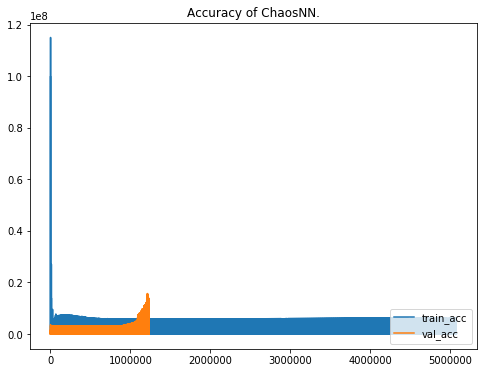

In [11]:
epoch = 1000
gpu = 0
out = "result"

print('GPU: {}'.format(gpu))
print('# epoch: {}'.format(epoch))


model = ChaosNN()
if gpu >= 0:
    chainer.cuda.get_device(gpu).use() 
    model.to_gpu() 

optimizer = optimizers.Adam()
optimizer.setup(model)

N = len(train_x)
N_val = len(val_x)

train_acc = []
val_acc = []

for epo in xrange(1, epoch+1):
    print 'epoch', epo

    # training
    sum_accuracy = 0
    sum_loss = 0
    start = time.time()
    for i in xrange(0, N):
        x0 = Variable(xp.array([train_x[i][0]],dtype=xp.float32))
        x1 = Variable(xp.array([train_x[i][1]],dtype=xp.float32))
        x2 = Variable(xp.array([train_x[i][2]],dtype=xp.float32))
        x3 = Variable(xp.array([train_x[i][3]],dtype=xp.float32))
        x4 = Variable(xp.array([train_x[i][4]],dtype=xp.float32))
        y = Variable(xp.array([train_y[i]],dtype=xp.float32))
        
        model.zerograds()
        loss = model(x0,x1,x2,x3,x4,y)
        loss.backward()

        optimizer.update()
        train_acc.append(float(loss.data))
        sum_loss += float(loss.data) * len(y.data)
        #sum_accuracy += float(model.accuracy.data) * len(y.data)

    end = time.time()
    elapsed_time = end-start 
    throughput = N / elapsed_time

    print 'train mean loss={}, accuracy={}, throughput={} images/sec'.format(sum_loss / N, sum_accuracy / N, throughput)

    # evaluation
    sum_accuracy = 0
    sum_loss     = 0
    for i in xrange(0, N_val):
        x0 = Variable(xp.array([val_x[i][0]],dtype=xp.float32),volatile='on')
        x1 = Variable(xp.array([val_x[i][1]],dtype=xp.float32),volatile='on')
        x2 = Variable(xp.array([val_x[i][2]],dtype=xp.float32),volatile='on')
        x3 = Variable(xp.array([val_x[i][3]],dtype=xp.float32),volatile='on')
        x4 = Variable(xp.array([val_x[i][4]],dtype=xp.float32),volatile='on')
        y = Variable(xp.array([val_y[i]],dtype=xp.float32),volatile='on')
        
        loss = model(x0,x1,x2,x3,x4,y)
        val_acc.append(float(loss.data))
        sum_loss += float(loss.data) * len(y.data)
        #sum_accuracy += float(model.accuracy.data) * len(y.data)
    print 'test  mean loss={}, accuracy={}'.format(sum_loss / N_val, sum_accuracy / N_val)

    #Save
    outfile = out + str(epo) + ".model"
    serializers.save_npz(outfile,model)

#Plot
plt.figure(figsize=(8,6))
plt.plot(range(len(train_acc)), train_acc)
plt.plot(range(len(val_acc)), val_acc)
plt.legend(["train_acc","val_acc"],loc=4)
plt.title("Accuracy of ChaosNN.")
plt.plot()
plt.savefig("plot1.png")
plt.show()

In [ ]:
batchsize = 20
epoch = 1000
gpu = 0
out = "result"

print('GPU: {}'.format(gpu))
print('# Minibatch-size: {}'.format(batchsize))
print('# epoch: {}'.format(epoch))


model = ChaosNN()
if gpu >= 0:
    chainer.cuda.get_device(gpu).use() 
    model.to_gpu() 

optimizer = optimizers.Adam()
optimizer.setup(model)

N = len(train_x)
N_val = len(val_x)

train_acc = []
val_acc = []

for epo in xrange(1, epoch+1):
    print 'epoch', epo

    # training
    sum_accuracy = 0
    sum_loss = 0
    start = time.time()
    for i in xrange(0, N, batchsize):
        batch_x = train_x[i:i+batchsize]
        batch_y = train_y[i:i+batchsize]
        x0 = Variable(batch_x[0])
        x1 = Variable(batch_x[1])
        x2 = Variable(batch_x[2])
        x3 = Variable(batch_x[3])
        x4 = Variable(batch_x[4])
        y = Variable(batch_y)
        
        model.zerograds()
        loss = model(x0,x1,x2,x3,x4,y)
        loss.backward()
        

        optimizer.update()
        train_acc.append(float(model.accuracy.data))
        sum_loss += float(model.loss.data) * len(y.data)
        sum_accuracy += float(model.accuracy.data) * len(y.data)

    end = time.time()
    elapsed_time = end-start 
    throughput = N / elapsed_time

    print 'train mean loss={}, accuracy={}, throughput={} images/sec'.format(sum_loss / N, sum_accuracy / N, throughput)

    # evaluation
    sum_accuracy = 0
    sum_loss     = 0
    for i in xrange(0, N_val, batchsize):
        batch_x = val_x[i:i+batchsize]
        batch_y = val_y[i:i+batchsize]

        x0 = Variable(batch_x[0],volatile='on')
        x1 = Variable(batch_x[1],volatile='on')
        x2 = Variable(batch_x[2],volatile='on')
        x3 = Variable(batch_x[3],volatile='on')
        x4 = Variable(batch_x[4],volatile='on')
        y = Variable(batch_y,volatile='on')
        
        loss = model(x0,x1,x2,x3,x4,y)
        val_acc.append(float(model.accuracy.data))
        sum_loss += float(loss.data) * len(y.data)
        sum_accuracy += float(model.accuracy.data) * len(y.data)
    print 'test  mean loss={}, accuracy={}'.format(sum_loss / N_val, sum_accuracy / N_val)

    #Save
    outfile = out + str(epo) + ".model"
    serializers.save_npz(outfile,model)

#Plot
plt.figure(figsize=(8,6))
plt.plot(range(len(train_acc)), train_acc)
plt.plot(range(len(val_acc)), val_acc)
plt.legend(["train_acc","val_acc"],loc=4)
plt.title("Accuracy of ChaosNN.")
plt.plot()
plt.savefig("plot1.png")
plt.show()